## Grouping Data
- MOST important Pandas concepts.
- This is where Pandas starts to feel like SQL + Excel + Python combined.
- **`groupby()`** splits data into groups, applies calculations to each group, and combines the results.
- Think of it as:
    *“Group rows by something, then summarize them.”*

**Real-World Examples**: 
This is used daily in data science & analytics jobs.

    1. Average salary per department
    2. Total sales per city
    3. Number of students per grade
    4. Mean temperature per month
    5. Stock performance per company

### **`Groupby()`**
- The pandas `groupby() function` is a core tool for data manipulation that implements a **"split-apply-combine"** strategy.
    1. Split: The data is divided into groups based on a specified criterion (e.g., a column name or a list of column names). Example: City Name('Abu Dhabi','Amsterdam', 'Antalya')
    2. Apply: A function (e.g., sum(), mean(), count()) is executed on each individual group.
    3. Combine: The results from each group operation are combined into a single, unified pandas object and returns a GroupBy object, not a DataFrame, which serves as an intermediate container for subsequent operations. 
- Summary: 
1️⃣ Split → Group rows
2️⃣ Apply → calculation (mean, sum, count…)
3️⃣ Combine → output table
- Syntax: **`df.groupby('column_name').function()`**

![alt text](group_by_final_ex.png)


In [12]:
import pandas as pd
import csv

In [2]:
# df = pd.read_csv('cities_weather_data.csv')
# df

In [3]:
df = pd.read_csv('weather_by_cities.csv')
df

,day,city,temperature,windspeed,event
0,01/01/2017,new york,32,6,Rain
1,01/02/2017,new york,36,7,Sunny
2,01/03/2017,new york,28,12,Snow
3,01/04/2017,new york,33,7,Sunny
4,01/01/2017,mumbai,90,5,Sunny
5,01/02/2017,mumbai,85,12,Fog
6,01/03/2017,mumbai,87,15,Fog
7,01/04/2017,mumbai,92,5,Rain
8,01/01/2017,paris,45,20,Sunny
9,01/02/2017,paris,50,13,Cloudy


In [4]:
# data_frame_groupby = df.groupby("City")
# data_frame_groupby

In [5]:
df_groupby = df.groupby('city')
df_groupby

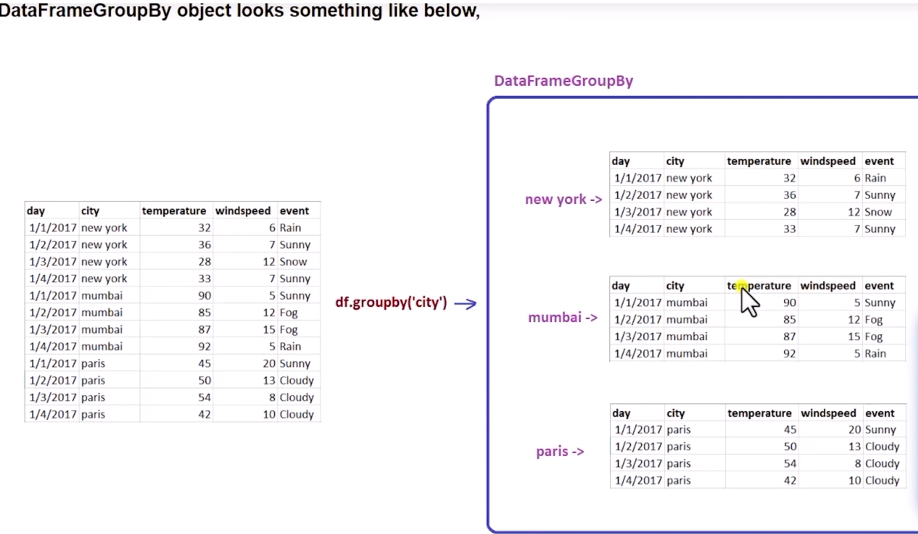

In [6]:
df.groupby('city')['temperature'].max()

city
mumbai      92
new york    36
paris       54
Name: temperature, dtype: int64

**`.get_group('column')`**
- Returns only the rows where `'column_name' == "value"` as a DataFrame.
- When to use get_group()
    1. To inspect one specific group
    2. Debugging or quick exploration
    3. Not used for aggregation
- The value must exist, otherwise it raises KeyError
- Syntax: **``**

In [7]:
df_groupby.get_group('paris')


,day,city,temperature,windspeed,event
8,01/01/2017,paris,45,20,Sunny
9,01/02/2017,paris,50,13,Cloudy
10,01/03/2017,paris,54,8,Cloudy
11,01/04/2017,paris,42,10,Cloudy


**`.max()`**

In [8]:
df_groupby.max()

,day,temperature,windspeed,event
city,,,,
mumbai,01/04/2017,92,15,Sunny
new york,01/04/2017,36,12,Sunny
paris,01/04/2017,54,20,Sunny


**`.min()`**

In [9]:
min = df_groupby.min()

![Split-Apply-Combine](1_w2oGdXv5btEMxAkAsz8fbg.webp)
- The above image demonstrates how **`Split-Apply-Combine`** Strategy works.
- First, it takes Input Data as DataFrame.
- Seconldy, it split data (groupby) into individual DataFrames.
- Thirdly, it will apply function on each of these individual DataFrames.
- Lastly, it will combine all these sub-results and will return single DataFrame.

**`.describe`**
- Generates quick summary statistics for a DataFrame or Series
- Used for fast data understanding and sanity checks
- For numeric columns, it shows:
    1. count – number of non-null values
    2. mean – average
    3. std – standard deviation
    4. min – minimum value
    5. 25%, 50%, 75% – quartiles (50% = median)
    6. max – maximum value
- For categorical columns (if included):
    1. count
    2. unique
    3. top – most frequent value
    4. freq – frequency of top value

In [10]:
df_groupby.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

**`.size()`**
- `size()` is similar to the standard Python len() function and counts every row within each group, including rows with NaN values.

In [11]:
df_groupby.size()

city
mumbai      4
new york    4
paris       4
dtype: int64